![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

<a id="1.1"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">IRIS DATASET using Scikit-Learn</h3>

**<font size="3"><a href="#chap1">1. Imports</a></font>**
**<br><font size="3"><a href="#chap2">2. Loading the dataset</a></font>**
**<br><font size="3"><a href="#chap3">3. Reading the dataset</a></font>**
**<br><font size="3"><a href="#chap4">4. Split the Data into Training and Test</a></font>**
**<br><font size="3"><a href="#chap5">5. Preprocessing and Standardizing the Data</a></font>**
**<br><font size="3"><a href="#chap6">6. Building the Network with Keras</a></font>**
**<br><font size="3"><a href="#chap7">7. Model Training</a></font>**
**<br><font size="3"><a href="#chap8">8. Predicting the model</a></font>**
**<br><font size="3"><a href="#chap9">9. Model Performance evaluation</a></font>**
**<br><font size="3"><a href="#chap10">10. Saving the model</a></font>**

<a id="chap1"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Imports</h3>

We're going to use the famous **IRIS dataset**.
More info on the data set is available on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

![Graphical view for Data Clustering](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/1200px-Iris_dataset_scatterplot.svg.png)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
from sklearn.datasets import load_iris

<a id="chap2"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Loading the dataset</h3>

In [4]:
iris = load_iris()
type(iris) ## Specialized Bunch Object

sklearn.utils.Bunch

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
len(iris)

7

<a id="chap3"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Reading the dataset</h3>

`Let's grab the feature and the Label information`

In [7]:
# Creating X as a feature object
X = iris.data

In [8]:
X # Just a numpy array with measurements lined up (Sepal-length, Sepal-width, Petal-length, Petal-width)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
# Grabbing Labels now
y = iris.target

In [10]:
print(f'{y}')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
## We have three classes above, class-0, class-1, class-2

`Converting into one-hot encoded system`
##### e.g; Since we've three classes, [0,1,2] Let's create a list with the Index positions of these classes:
1. Class 0 ----> [1, 0, 0]
2. Class 1 ----> [0, 1, 0]
3. Class 2 ----> [0, 0, 1]

In [12]:
## One hot encoding can be easily done using Keras
from keras.utils import to_categorical

In [13]:
# Type casting 'y'
y = to_categorical(y)

In [14]:
y.shape

(150, 3)

In [15]:
## y has 150 instances with 3 values per label

In [16]:
print(f'{y}') # one-hot encoded format

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

<a id="chap4"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Splitting the dataset</h3>

`# Let's split the data into a train/test set. You can also split it 3 ways, i.e; train/test/validation.`

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train # training data

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [19]:
X_test # testing features

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [20]:
y_train # labels for training data

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [21]:
y_test # labels for testing features

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

<a id="chap5"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Preprocessing and Standardizing the data</h3>

While working with Neural Networks, we get better performance when we standardize the data. Standardization just means normalizing the values to all fit between a certain range, like 0-1, or -1 to 1.

> e.g. if we take an array of numbers and divide it with it's max value in array, we get the output of numbers in between 0-1
`np.array([2,4,6,8])/8 will give the output as array([0.25, 0.5 , 0.75, 1.])`

The scikit learn library also provides a nice function for this known as the [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler_object = MinMaxScaler()

In [24]:
scaled_X_train = scaler_object.fit_transform(X_train)

In [25]:
scaled_X_test = scaler_object.transform(X_test) # we won't fit the test data as that would be cheating :P ;)

In [26]:
X_train.max()

7.7

In [27]:
scaled_X_train.max()

1.0

In [28]:
scaled_X_test.max()

1.0909090909090908

In [29]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [30]:
scaled_X_train

array([[0.41176471, 0.40909091, 0.55357143, 0.5       ],
       [0.97058824, 0.45454545, 0.98214286, 0.83333333],
       [0.38235294, 0.45454545, 0.60714286, 0.58333333],
       [0.23529412, 0.68181818, 0.05357143, 0.04166667],
       [1.        , 0.36363636, 1.        , 0.79166667],
       [0.44117647, 0.31818182, 0.53571429, 0.375     ],
       [0.26470588, 0.63636364, 0.05357143, 0.04166667],
       [0.20588235, 0.68181818, 0.03571429, 0.08333333],
       [0.23529412, 0.81818182, 0.14285714, 0.125     ],
       [0.20588235, 0.        , 0.42857143, 0.375     ],
       [0.58823529, 0.31818182, 0.67857143, 0.70833333],
       [0.14705882, 0.63636364, 0.14285714, 0.04166667],
       [0.20588235, 0.45454545, 0.08928571, 0.04166667],
       [0.23529412, 0.59090909, 0.10714286, 0.16666667],
       [0.38235294, 0.31818182, 0.55357143, 0.5       ],
       [0.23529412, 0.63636364, 0.07142857, 0.04166667],
       [0.41176471, 0.45454545, 0.55357143, 0.45833333],
       [1.        , 0.81818182,

<a id="chap6"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Network Building using KERAS</h3>

In [31]:
## Activating model session on GPU
import keras
import tensorflow.compat.v1 as tf

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
tf.compat.v1.keras.backend.set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [32]:
# Building a Sequential Keras model
from keras.models import Sequential
from keras.layers import Dense

In [33]:
# Creating a model instance and generating simple layers
model = Sequential()
model.add(Dense(16,input_dim=4, activation='relu')) # I used 16 neurons, input_dim = 4 since we expect 4 features, and Rectified Linear Unit as activ. fn.
model.add(Dense(16,input_dim=4, activation='relu')) # Adding another dense layer
model.add(Dense(3,activation='softmax')) # Each neuron will have a probability of belonging to a particular class as we've three classes
## The output of the above 3 neurons will look something like [0.1,0.3,0.6] with 3rd class having the highest probability.
## Since we used softmax, it will give us a basic idea where our max probability is leaning towards!

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
## Since we've three categories, hence, we used loss = categorical_crossentropy to perform loss

In [34]:
# Let's check the shape of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


<a id="chap7"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Model Training</h3>

In [35]:
# Also known as fitting the model
history = model.fit(scaled_X_train, y_train, batch_size=8, epochs=240, steps_per_epoch=10, verbose=2)

Epoch 1/240
10/10 - 0s - loss: 1.1000 - accuracy: 0.4125
Epoch 2/240
10/10 - 0s - loss: 1.0721 - accuracy: 0.6316
Epoch 3/240
10/10 - 0s - loss: 1.0238 - accuracy: 0.6842
Epoch 4/240
10/10 - 0s - loss: 0.9989 - accuracy: 0.6579
Epoch 5/240
10/10 - 0s - loss: 0.9667 - accuracy: 0.6500
Epoch 6/240
10/10 - 0s - loss: 0.9312 - accuracy: 0.6711
Epoch 7/240
10/10 - 0s - loss: 0.9025 - accuracy: 0.6447
Epoch 8/240
10/10 - 0s - loss: 0.8747 - accuracy: 0.6579
Epoch 9/240
10/10 - 0s - loss: 0.8422 - accuracy: 0.6375
Epoch 10/240
10/10 - 0s - loss: 0.8154 - accuracy: 0.6447
Epoch 11/240
10/10 - 0s - loss: 0.7811 - accuracy: 0.6316
Epoch 12/240
10/10 - 0s - loss: 0.7456 - accuracy: 0.6579
Epoch 13/240
10/10 - 0s - loss: 0.7307 - accuracy: 0.6579
Epoch 14/240
10/10 - 0s - loss: 0.7089 - accuracy: 0.7625
Epoch 15/240
10/10 - 0s - loss: 0.6649 - accuracy: 0.8026
Epoch 16/240
10/10 - 0s - loss: 0.6492 - accuracy: 0.8158
Epoch 17/240
10/10 - 0s - loss: 0.6211 - accuracy: 0.7237
Epoch 18/240
10/10 - 0s

In [36]:
import matplotlib.pyplot as plt

In [37]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


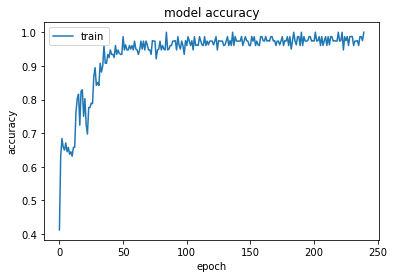

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

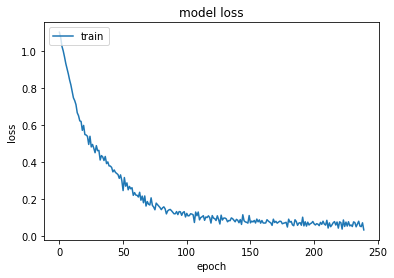

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<a id="chap8"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Model Prediction</h3>

In [40]:
model.predict_classes(scaled_X_test) # Predicts the classes

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [41]:
# Let's compare these predictions above to our unseen 'y_test' data
predictions = model.predict_classes(scaled_X_test)

In [42]:
y_test.argmax(axis=1) # from the one-hot encoded version of y_test, argmax will report back the predicted classes at each index

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

<a id="chap9"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Model Performance Evaluation</h3>

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
model.evaluate(x=scaled_X_test,y=y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0686 - accuracy: 0.9600


[0.06860758364200592, 0.9599999785423279]

In [46]:
print(confusion_matrix(y_test.argmax(axis=1),predictions))
print('------------------------------------------------------')
print('------------------------------------------------------')
print(classification_report(y_test.argmax(axis=1),predictions))

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]
------------------------------------------------------
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



<a id="chap10"></a>
<h3 style="background-color:gold;font-family:newtimeroman;font-size:200%;text-align:center">Loading and saving the model</h3>

In [47]:
model.save('iris_model.h5')

In [48]:
from keras.models import load_model

In [49]:
iris_model = load_model('iris_model.h5')

In [50]:
iris_model.predict_classes(X_test)

array([2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2])